# Algerian_forest_fires

- It is a  Algerian Forest Fires Dataset. Containing 2 Regions Bejaia Region and Sidi-Bel Abbes Region In it.

- Independent/Input Features: day,month,year,Temperature, RH, Ws,Rain ,FFMC,DMC,DC,ISI,BUI

- Dependent Feature: FWI (Regression),Classes (Classification)

In [235]:
!pip install -r ../requirements.txt

# Loading the Dataset

In [236]:
# import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV
from sklearn.pipeline import Pipeline

from ydata_profiling import ProfileReport

from sklearn.metrics import r2_score,mean_squared_error

In [237]:
# Load The dataset

dataset=pd.read_csv('../dataset/Algerian_forest_fires_dataset.csv',header=1)
dataset.sample(5)

day month  year Temperature  RH  Ws Rain   FFMC   DMC    DC   ISI   BUI  \
158  05    07  2012          34  45  18     0  90.5  18.7  46.4  11.3  18.7   
172  19    07  2012          34  58  16     0  88.1  27.8  61.1   7.3  27.7   
212  28    08  2012          35  56  14   0.4  79.2    37   166   2.1  30.6   
53   24    07  2012          28  78  16   0.1    70   9.6  79.7   1.4  14.7   
9    10    06  2012          28  79  12     0  73.2   9.5  46.3   1.3  12.6   

     FWI    Classes    
158   15      fire     
172   13      fire     
212  6.1  not fire     
53   1.3  not fire     
9    0.9  not fire

# Data Cleaning

In [238]:
dataset.head(5)

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [239]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [240]:
dataset.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [241]:
dataset.iloc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object

In [242]:
# Removing Region Header and adding new Region Col and encoding it by Bejaia Region=0 and Sidi-Bel Abbes as 1
dataset.loc[:121, 'region'] = 0      # Bejaia
dataset.loc[122:, 'region'] = 1      # Sidi-Bel Abbes

In [243]:
dataset.tail()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    region  
241  6.5       fire        1.0  
242    0   not fire        1.0  
243  0.2   not fire        1.0  
244  0.7   not fire        1.0  
245  0.5  not fire         1.0

In [244]:
dataset.iloc[120:125]

day  month  year  Temperature   RH   Ws  Rain   \
120                             29     09  2012           26   80   16    1.8   
121                             30     09  2012           25   78   14    1.4   
122  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
123                            day  month  year  Temperature   RH   Ws  Rain    
124                             01     06  2012           32   71   12    0.7   

     FFMC  DMC   DC  ISI  BUI  FWI    Classes    region  
120  47.4  2.9  7.7  0.3    3  0.1  not fire        0.0  
121    45  1.9  7.5  0.2  2.4  0.1  not fire        0.0  
122   NaN  NaN  NaN  NaN  NaN  NaN          NaN     1.0  
123  FFMC  DMC   DC  ISI  BUI  FWI    Classes       1.0  
124  57.1  2.5  8.2  0.6  2.8  0.2  not fire        1.0

In [245]:
dataset.iloc[122:124]

day  month  year  Temperature   RH   Ws  Rain   \
122  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
123                            day  month  year  Temperature   RH   Ws  Rain    

     FFMC  DMC   DC  ISI  BUI  FWI  Classes    region  
122   NaN  NaN  NaN  NaN  NaN  NaN        NaN     1.0  
123  FFMC  DMC   DC  ISI  BUI  FWI  Classes       1.0

In [246]:
# Removing 122,123 rows and then Resetting the index
dataset = dataset.drop(dataset.index[122:124])
dataset=dataset.reset_index()

In [247]:
# Dataset Region Cleaned
dataset.iloc[120:125]

index day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  \
120    120  29    09  2012          26  80  16   1.8  47.4  2.9  7.7  0.3   
121    121  30    09  2012          25  78  14   1.4    45  1.9  7.5  0.2   
122    124  01    06  2012          32  71  12   0.7  57.1  2.5  8.2  0.6   
123    125  02    06  2012          30  73  13     4  55.7  2.7  7.8  0.6   
124    126  03    06  2012          29  80  14     2  48.7  2.2  7.6  0.3   

     BUI  FWI    Classes    region  
120    3  0.1  not fire        0.0  
121  2.4  0.1  not fire        0.0  
122  2.8  0.2  not fire        1.0  
123  2.9  0.2  not fire        1.0  
124  2.6  0.1  not fire        1.0

In [248]:
dataset

index day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  \
0        0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   
1        1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   
2        2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   
3        3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   
4        4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2   
..     ...  ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   
239    241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5   
240    242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   
241    243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   
242    244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   
243    245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   

      BUI  FWI     Classes    region  
0     3.4  0.5   not fire        0.0  
1     3.9  0.4   not fire        0.0  
2     2.7  0.1   not fire        0.0  
3     1.7    0   not fire        0.0  
4     3.9  0.5   not fire        0.0  
..    ...  ...           ...     ...  
239  16.9  6.5       fire        1.0  
240   6.2    0   not fire        1.0  
241   3.4  0.2   not fire        1.0  
242   5.1  0.7   not fire        1.0  
243   4.8  0.5  not fire         1.0  

[244 rows x 16 columns]

In [249]:
# Cleaning Null Values
dataset.isna().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [250]:
dataset.isna()

index    day  month   year  Temperature     RH     Ws  Rain    FFMC  \
0    False  False  False  False        False  False  False  False  False   
1    False  False  False  False        False  False  False  False  False   
2    False  False  False  False        False  False  False  False  False   
3    False  False  False  False        False  False  False  False  False   
4    False  False  False  False        False  False  False  False  False   
..     ...    ...    ...    ...          ...    ...    ...    ...    ...   
239  False  False  False  False        False  False  False  False  False   
240  False  False  False  False        False  False  False  False  False   
241  False  False  False  False        False  False  False  False  False   
242  False  False  False  False        False  False  False  False  False   
243  False  False  False  False        False  False  False  False  False   

       DMC     DC    ISI    BUI    FWI  Classes    region  
0    False  False  False  False  False      False   False  
1    False  False  False  False  False      False   False  
2    False  False  False  False  False      False   False  
3    False  False  False  False  False      False   False  
4    False  False  False  False  False      False   False  
..     ...    ...    ...    ...    ...        ...     ...  
239  False  False  False  False  False      False   False  
240  False  False  False  False  False      False   False  
241  False  False  False  False  False      False   False  
242  False  False  False  False  False      False   False  
243  False  False  False  False  False      False   False  

[244 rows x 16 columns]

In [251]:
dataset[dataset.isna().any(axis=1)]

index day month  year Temperature  RH  Ws Rain   FFMC   DMC      DC  \
165    167  14    07  2012          37  37  18   0.2  88.9  12.9  14.6 9   

      ISI   BUI      FWI Classes    region  
165  12.5  10.4  fire          NaN     1.0

In [252]:
dataset.iloc[165]

index              167
day                 14
month               07
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
region             1.0
Name: 165, dtype: object

In [253]:
dataset=dataset.drop(165)
dataset=dataset.reset_index()

In [254]:
# Data With Null Values if Cleaned
dataset[dataset.isna().any(axis=1)]

Empty DataFrame
Columns: [level_0, index, day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  , region]
Index: []

In [255]:
# Check For duplicates
dataset[dataset.duplicated()]

# No Duplicated

Empty DataFrame
Columns: [level_0, index, day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  , region]
Index: []

In [256]:
dataset.columns

Index(['level_0', 'index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws',
       'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ',
       'region'],
      dtype='object')

In [257]:
# Columns have extra Space for classes column

dataset.columns=dataset.columns.str.strip()

In [258]:
dataset.columns

# The Extra Space Issue is Solved


Index(['level_0', 'index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws',
       'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [259]:
dataset['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [260]:
dataset['Classes'].str

In [261]:
dataset['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [262]:
# There are multiple Columns with same meaning but with different spellings... resetting it

dataset['Classes']=dataset['Classes'].str.strip().str.lower()

In [263]:
dataset['Classes'].value_counts()
# The Classes Column is cleanedd

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [264]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   level_0      243 non-null    int64  
 1   index        243 non-null    int64  
 2   day          243 non-null    object 
 3   month        243 non-null    object 
 4   year         243 non-null    object 
 5   Temperature  243 non-null    object 
 6   RH           243 non-null    object 
 7   Ws           243 non-null    object 
 8   Rain         243 non-null    object 
 9   FFMC         243 non-null    object 
 10  DMC          243 non-null    object 
 11  DC           243 non-null    object 
 12  ISI          243 non-null    object 
 13  BUI          243 non-null    object 
 14  FWI          243 non-null    object 
 15  Classes      243 non-null    object 
 16  region       243 non-null    float64
dtypes: float64(1), int64(2), object(14)
memory usage: 32.4+ KB


In [265]:
dataset.head()

level_0  index day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  \
0        0      0  01    06  2012          29  57  18     0  65.7  3.4   7.6   
1        1      1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6   
2        2      2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1   
3        3      3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9   
4        4      4  05    06  2012          27  77  16     0  64.8    3  14.2   

   ISI  BUI  FWI   Classes  region  
0  1.3  3.4  0.5  not fire     0.0  
1    1  3.9  0.4  not fire     0.0  
2  0.3  2.7  0.1  not fire     0.0  
3    0  1.7    0  not fire     0.0  
4  1.2  3.9  0.5  not fire     0.0

In [266]:
# droppping level_0	index columns

dataset=dataset.drop(columns=['level_0','index'])

In [267]:
dataset.head()

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

    Classes  region  
0  not fire     0.0  
1  not fire     0.0  
2  not fire     0.0  
3  not fire     0.0  
4  not fire     0.0

In [268]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [269]:
# Changing Datatype of all the columns from Object to its respective datatype

cols = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain']

dataset[cols] = (
    dataset[cols]
    .apply(lambda col: col.astype(str).str.strip())   # remove spaces
    .apply(pd.to_numeric, errors='coerce')             # force numeric
)

In [270]:
dataset.iloc[:, :6].dtypes


day            int64
month          int64
year           int64
Temperature    int64
RH             int64
Ws             int64
dtype: object

In [271]:
dataset

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2      3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4      5      6  2012           27  77  16   0.0  64.8    3  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...  ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4   16  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1  6.5     8  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI   Classes  region  
0    0.5  not fire     0.0  
1    0.4  not fire     0.0  
2    0.1  not fire     0.0  
3      0  not fire     0.0  
4    0.5  not fire     0.0  
..   ...       ...     ...  
238  6.5      fire     1.0  
239    0  not fire     1.0  
240  0.2  not fire     1.0  
241  0.7  not fire     1.0  
242  0.5  not fire     1.0  

[243 rows x 15 columns]

In [272]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  region       243 non-null    float64
dtypes: float64(2), int64(6), object(7)
memory usage: 28.6+ KB


In [273]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [274]:
cols = ['FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']

dataset[cols] = (
    dataset[cols]
    .apply(lambda col: col.astype(str).str.strip())   # remove spaces
    .apply(pd.to_numeric, errors='coerce')             # force numeric
)

In [275]:
dataset.info()
# Dataset Cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [276]:
dataset['region']=dataset['region'].astype('int')

In [277]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [278]:
dataset

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI   Classes  region  
0    0.5  not fire       0  
1    0.4  not fire       0  
2    0.1  not fire       0  
3    0.0  not fire       0  
4    0.5  not fire       0  
..   ...       ...     ...  
238  6.5      fire       1  
239  0.0  not fire       1  
240  0.2  not fire       1  
241  0.7  not fire       1  
242  0.5  not fire       1  

[243 rows x 15 columns]

In [279]:
# Downloading Cleaned Dataset

dataset.to_csv('../dataset/Algerian_forest_fires_cleaned_dataset.csv',index=False)

# EDA

In [280]:
dataset=pd.read_csv('../dataset/Algerian_forest_fires_cleaned_dataset.csv')

In [281]:
dataset.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  region  
0  0.5  not fire       0  
1  0.4  not fire       0  
2  0.1  not fire       0  
3  0.0  not fire       0  
4  0.5  not fire       0

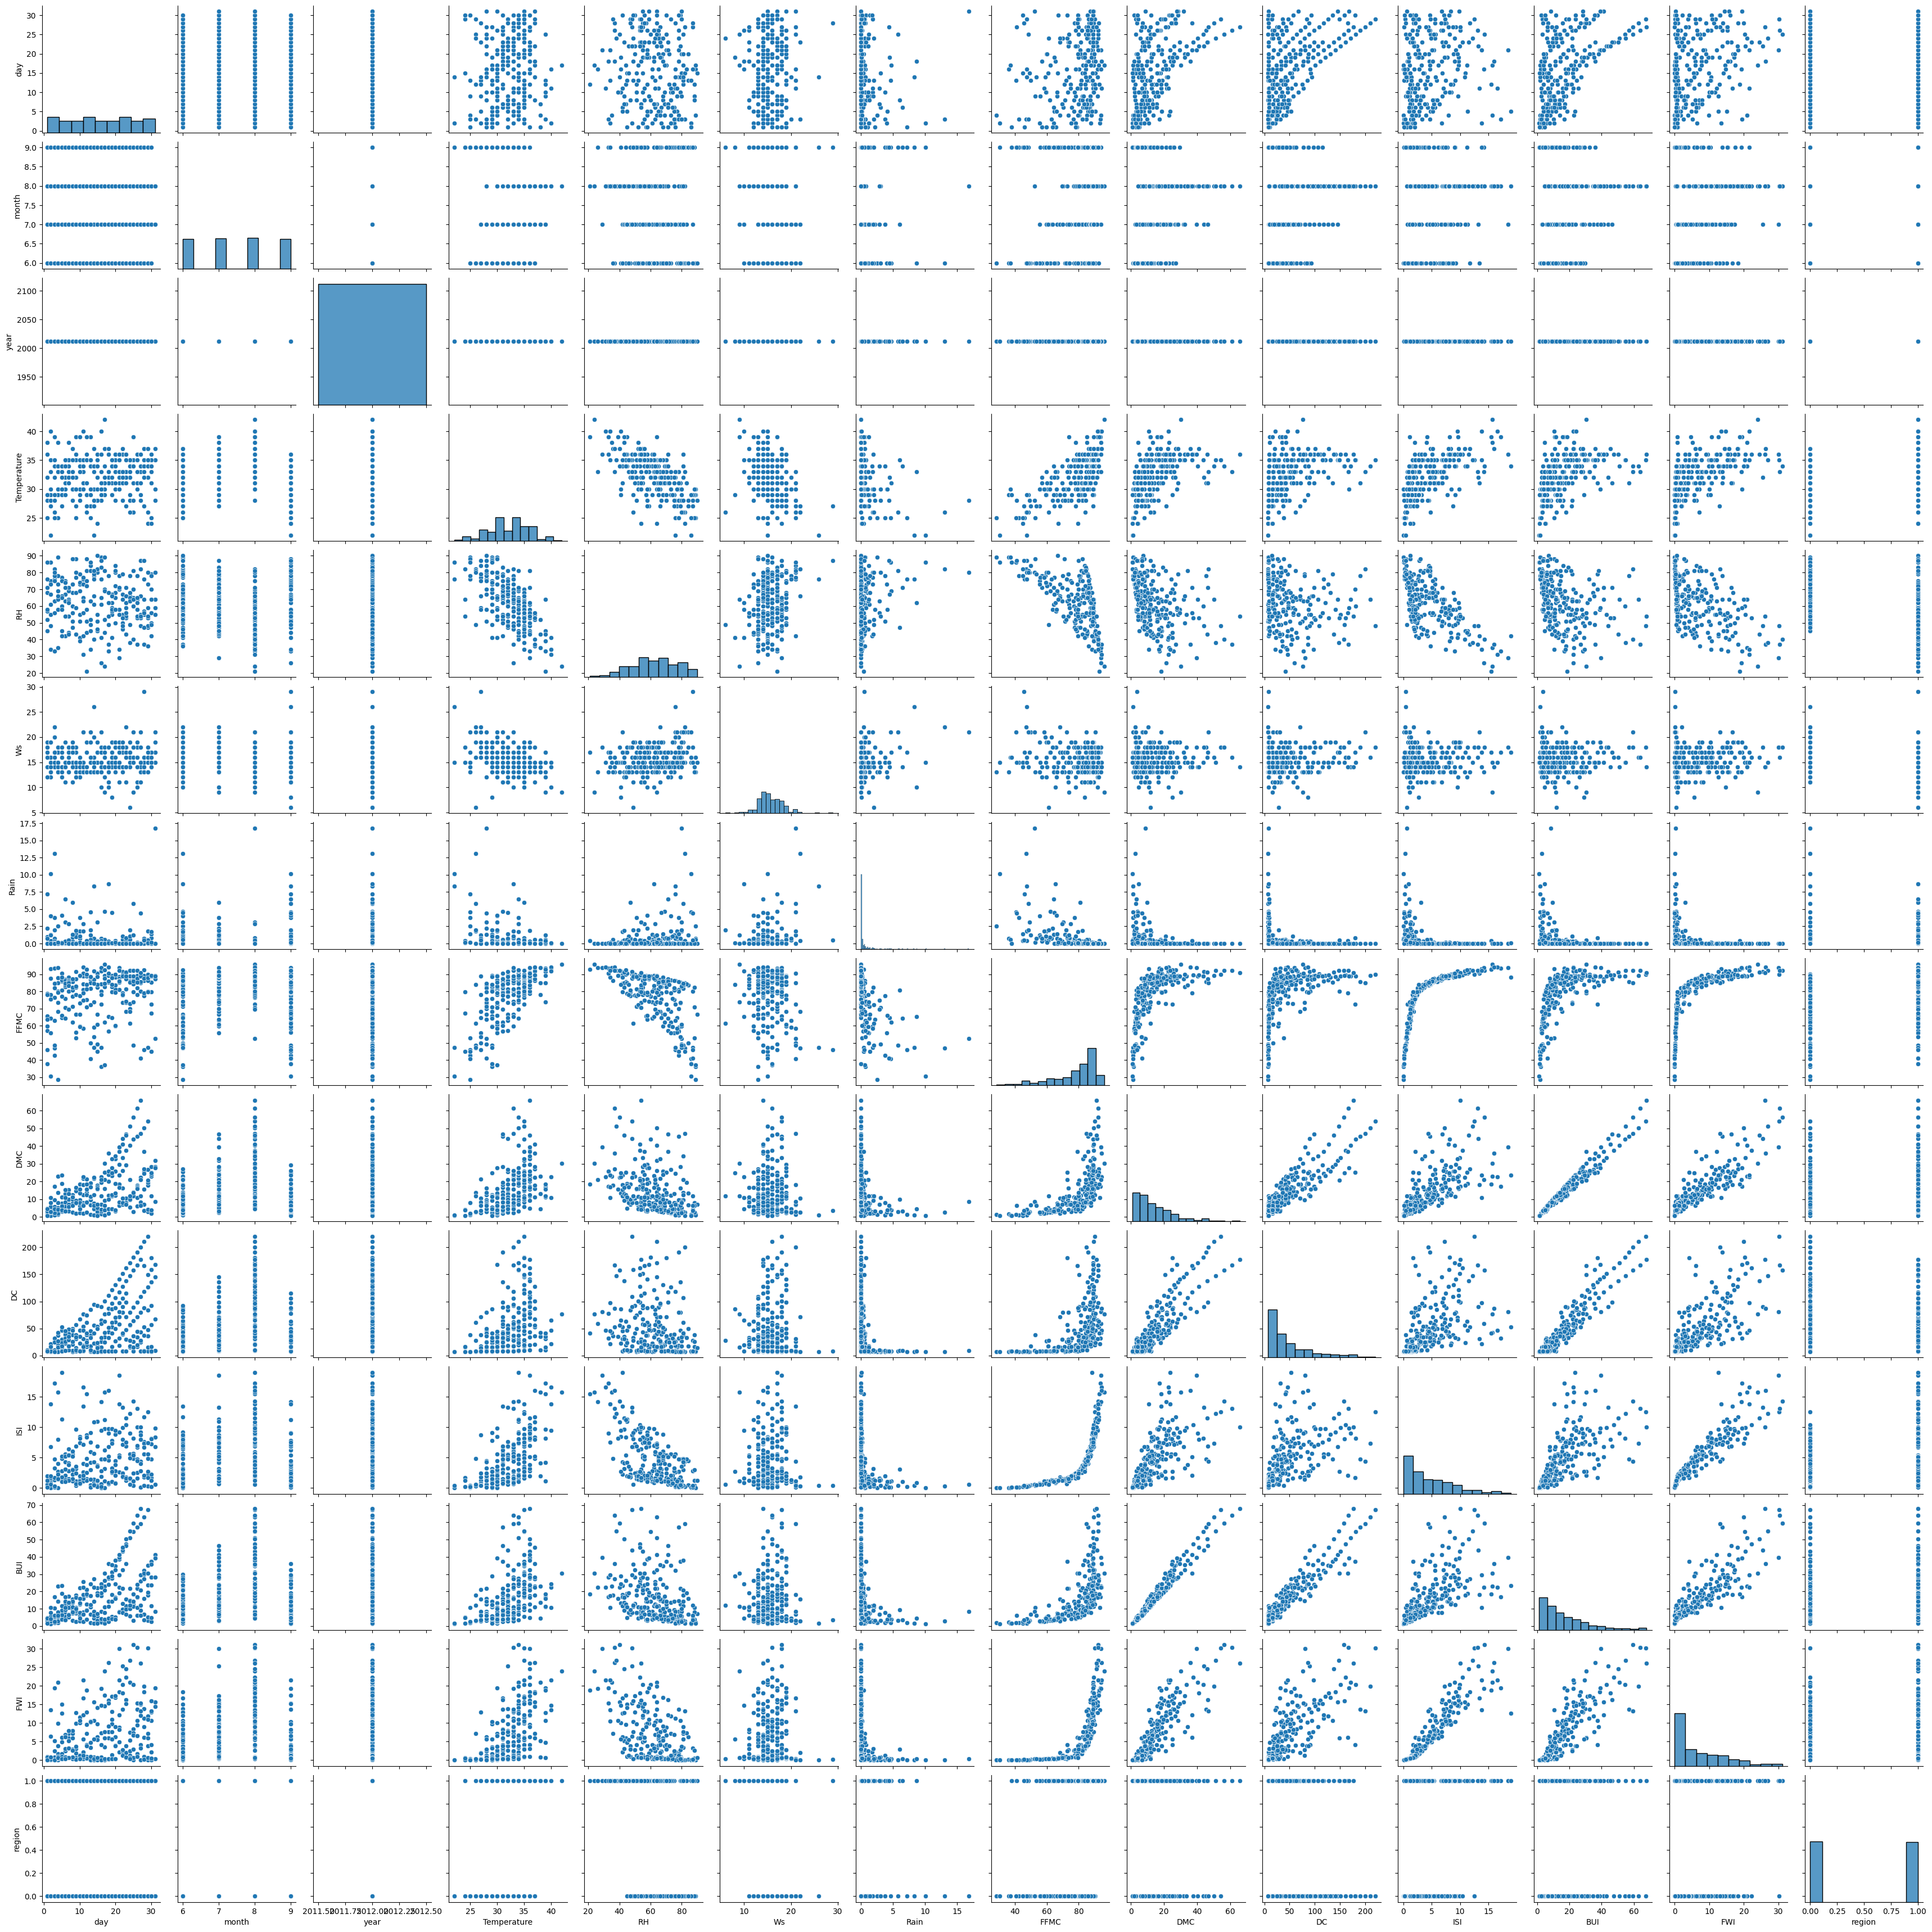

In [282]:
sns.pairplot(data=dataset)

In [283]:
# EDA using pandas Profiling
eda=ProfileReport(dataset,title="Algerian Forest Fires Dataset Profiling Report")
eda.to_file("your_report.html")
eda.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 1241.09it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Model Splitting

In [284]:
dataset.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  region  
0  0.5  not fire       0  
1  0.4  not fire       0  
2  0.1  not fire       0  
3  0.0  not fire       0  
4  0.5  not fire       0

In [285]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [286]:
X_train,X_test,y_train,y_test=train_test_split(dataset.iloc[:,:12],dataset.iloc[:,12:13],test_size=0.25,random_state=42)

In [287]:
X_train

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI
97     6      9  2012           29  74  19   0.1  75.8   3.6  32.2   2.1   5.6
141   20      6  2012           31  72  14   0.2  60.2   3.8   8.0   0.8   3.7
192   11      8  2012           40  31  15   0.0  94.2  22.5  46.3  16.6  22.4
68     8      8  2012           32  60  18   0.3  77.1  11.3  47.0   2.2  14.1
119   28      9  2012           32  47  14   0.7  77.5   7.1   8.8   1.8   6.8
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...   ...   ...
106   15      9  2012           24  82  15   0.4  44.9   0.9   7.3   0.2   1.4
14    15      6  2012           28  80  17   3.1  49.4   3.0   7.4   0.4   3.0
92     1      9  2012           25  76  17   7.2  46.0   1.3   7.5   0.2   1.8
179   29      7  2012           34  59  16   0.0  88.1  19.5  47.2   7.4  19.5
102   11      9  2012           30  77  21   1.8  58.5   1.9   8.4   1.1   2.4

[182 rows x 12 columns]

In [288]:
y_train

FWI
97    0.9
141   0.3
192  21.6
68    2.6
119   0.9
..    ...
106   0.0
14    0.1
92    0.1
179  10.9
102   0.3

[182 rows x 1 columns]

# Standard Scaling and Pipeline Building

## Linear Regression

In [289]:
linear_regression=LinearRegression()
scaler=StandardScaler()

linear_regression_pipeline=Pipeline([
    ('scaler',scaler),
    ('linear_regression',linear_regression)
])

linear_regression_pipeline.fit(X_train,y_train)
y_predicted=linear_regression_pipeline.predict(X_test)

# Evaluation
print(f'r2 Score: {r2_score(y_pred=y_predicted,y_true=y_test)*100:.2f}')
print(f'MSE: {mean_squared_error(y_pred=y_predicted,y_true=y_test)*100:.2f}')

r2 Score: 98.82
MSE: 52.27


## Ridge regression

### ridge regression without cross validation

In [290]:
ridge_regression=Ridge()
scaler=StandardScaler()

ridge_regression_pipeline=Pipeline([
    ('scaler',scaler),
    ('ridge_regression',ridge_regression)
])

ridge_regression_pipeline.fit(X_train,y_train)
y_predicted=ridge_regression_pipeline.predict(X_test)

# Evaluation
print(f'r2 Score: {r2_score(y_pred=y_predicted,y_true=y_test)*100:.2f}')
print(f'MSE: {mean_squared_error(y_pred=y_predicted,y_true=y_test)*100:.2f}')

r2 Score: 98.56
MSE: 63.72


### ridge regression with cross validation

In [291]:
ridgecv_regression=RidgeCV(cv=10)
scaler=StandardScaler()

ridgecv_regression_pipeline=Pipeline([
    ('scaler',scaler),
    ('ridgecv_regression',ridgecv_regression)
])

ridgecv_regression_pipeline.fit(X_train,y_train)
y_predicted=ridgecv_regression_pipeline.predict(X_test)

# Evaluation
print(f'r2 Score: {r2_score(y_pred=y_predicted,y_true=y_test)*100:.2f}')
print(f'MSE: {mean_squared_error(y_pred=y_predicted,y_true=y_test)*100:.2f}')

r2 Score: 98.56
MSE: 63.72


## Lasso regression

### Lasso Regression Without cross validation

In [292]:
lasso_regression=Lasso()
scaler=StandardScaler()

lasso_regression_pipeline=Pipeline([
    ('scaler',scaler),
    ('lasso_regression',lasso_regression)
])

lasso_regression_pipeline.fit(X_train,y_train)
y_predicted=lasso_regression_pipeline.predict(X_test)

# Evaluation
print(f'r2 Score: {r2_score(y_pred=y_predicted,y_true=y_test)*100:.2f}')
print(f'MSE: {mean_squared_error(y_pred=y_predicted,y_true=y_test)*100:.2f}')

r2 Score: 95.48
MSE: 200.01


### Lasso Regression With cross validation

In [293]:
lassocv_regression=LassoCV(cv=5)
scaler=StandardScaler()

lassocv_regression_pipeline=Pipeline([
    ('scaler',scaler),
    ('lassocv_regression',lassocv_regression)
])

lassocv_regression_pipeline.fit(X_train,y_train)
y_predicted=lassocv_regression_pipeline.predict(X_test)

# Evaluation
print(f'r2 Score: {r2_score(y_pred=y_predicted,y_true=y_test)*100:.2f}')
print(f'MSE: {mean_squared_error(y_pred=y_predicted,y_true=y_test)*100:.2f}')

r2 Score: 98.63
MSE: 60.79


c:\Users\sambhav_surthi\anaconda3\envs\projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## ElasticNet Regression

### ElasticNet Regression Without cross validation

In [294]:
elasticnet_regression=ElasticNet()
scaler=StandardScaler()

elasticnet_regression_pipeline=Pipeline([
    ('scaler',scaler),
    ('elasticnet_regression',elasticnet_regression)
])

elasticnet_regression_pipeline.fit(X_train,y_train)
y_predicted=elasticnet_regression_pipeline.predict(X_test)

# Evaluation
print(f'r2 Score: {r2_score(y_pred=y_predicted,y_true=y_test)*100:.2f}')
print(f'MSE: {mean_squared_error(y_pred=y_predicted,y_true=y_test)*100:.2f}')

r2 Score: 89.39
MSE: 469.64


### ElasticNet Regression Without cross validation

In [295]:
elasticnetcv_regression=ElasticNetCV(cv=10)
scaler=StandardScaler()

elasticnetcv_regression_pipeline=Pipeline([
    ('scaler',scaler),
    ('elasticnetcv_regression',elasticnetcv_regression)
])

elasticnetcv_regression_pipeline.fit(X_train,y_train)
y_predicted=elasticnetcv_regression_pipeline.predict(X_test)

# Evaluation
print(f'r2 Score: {r2_score(y_pred=y_predicted,y_true=y_test)*100:.2f}')
print(f'MSE: {mean_squared_error(y_pred=y_predicted,y_true=y_test)*100:.2f}')

c:\Users\sambhav_surthi\anaconda3\envs\projects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 Score: 98.35
MSE: 72.92


# Model Pickling

In [298]:
pickle.dump(linear_regression_pipeline,file=open('linear_regression.pkl','wb'))
pickle.dump(ridge_regression_pipeline,file=open('ridge_regression.pkl','wb'))
pickle.dump(lasso_regression_pipeline,file=open('lasso_regression.pkl','wb'))
pickle.dump(elasticnet_regression_pipeline,file=open('elasticnet_regression.pkl','wb'))